仿真版本论文，互适应部分。实验结果文件夹

simu_result/muad

In [1]:
from functions import *
from agent import *
from collaborate_rescue import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from functools import reduce
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# 检查collaborate_rescue_1中human_ps是否是人类的策略
for i in [1]:
    
    # delta=0.5, ita=0.8, w=0.5
    result = collaborate_rescue_1(0.5, 0.8, 0.5)
    cycle = [[x for j in range(500)] for x in range(200)] # 200个周期（每个周期500个数据）
    cycle = reduce(lambda x,y: x+y, cycle)
    result['cycle'] = cycle
    
    # 1. 人类信任
    human_trust = result.groupby('cycle')['human_trust'].agg(lambda x:sum(x)/len(x)).reset_index()
    human_trust.rename(columns={'human_trust':'h1'}, inplace=True)
    
    # 2. 人类适应性
    human_target_1 = result.groupby('cycle')['human_target_1'].agg(get_std).reset_index()
    human_target_1.rename(columns={'human_target_1': 'h2'}, inplace=True)
    
    # 3. 机器人算法性能
    robot_q = pd.DataFrame()
    robot_q['cycle'] = list(range(200))
    robot_q['robot_q_pre'] = ''
    for k in range(16):
        tmp = result.groupby('cycle')['robot_q_'+str(k)].agg(lambda x:'+'.join(x))
        robot_q['robot_q_pre'] = robot_q['robot_q_pre'] + ':' + tmp
    robot_q['r1'] = robot_q['robot_q_pre'].apply(get_std_1)
    robot_q = robot_q[['cycle', 'r1']]
    
    # 4. 机器人任务绩效
    robot_task_count = result.groupby('cycle')['robot_task_count'].agg(lambda x:sum(x)).reset_index()
    robot_task_count.rename(columns={'robot_task_count':'r2'}, inplace=True)
    
    # 5. 人机协作绩效
    task_count = result.groupby('cycle')['task_count'].agg(lambda x:sum(x)).reset_index()
    task_count.rename(columns={'task_count':'t'}, inplace=True)
    
    # 合并结果
    muad = pd.merge(human_trust, human_target_1, how='outer')
    muad = pd.merge(muad, robot_q, how='outer')
    muad = pd.merge(muad, robot_task_count, how='outer')
    muad = pd.merge(muad, task_count, how='outer')
    muad = muad[['h1', 'h2', 'r1', 'r2' , 't']][100:].copy()
    
    # 归一化
    scaler = MinMaxScaler()
    data = scaler.fit_transform(muad)
    muad.loc[:, :] = data

    break

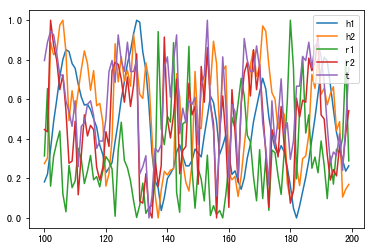

In [5]:
muad.plot()

In [ ]:
name = ''
muad.to_csv('result/muad/'+name+'.csv', index=None)